In [1]:
!pip install mlxtend 

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split

In [49]:
data = pd.read_csv('/content/drive/MyDrive/DED Codes/Porosity prediction in DED/New Datasets - Pixel/Pyrometer Data 6.csv')
x = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:,-1])
print(x)
print(y)

[[9.00000000e+01 1.40000000e+02 0.00000000e+00 ... 4.09862584e-05
  1.76683384e+02 2.30076185e+02]
 [4.45975000e+02 3.63300000e+02 0.00000000e+00 ... 3.77488044e-02
  2.77946808e+02 1.43679248e+02]
 [8.80975000e+02 6.35900000e+02 0.00000000e+00 ... 2.25944836e-02
  1.65276945e+02 2.21063236e+01]
 ...
 [1.01147500e+03 7.17825000e+02 9.57580000e+00 ... 0.00000000e+00
  1.10545968e+02 3.78940160e+02]
 [1.01147500e+03 7.17825000e+02 9.57580000e+00 ... 0.00000000e+00
  2.80101453e+02 1.29355219e+02]
 [1.01147500e+03 7.17825000e+02 9.57580000e+00 ... 0.00000000e+00
  4.33151560e+02 1.25897665e+03]]
[0. 0. 0. ... 0. 0. 0.]


In [50]:
# Normalize data
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [41]:
knn = KNeighborsClassifier(n_neighbors=4)

sfs1 = SFS(knn, 
           k_features=9, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(x, y)
sfs1.k_feature_names_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    5.0s finished

[2022-04-08 07:33:53] Features: 1/9 -- score: 0.9672837350098964[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.5s finished

[2022-04-08 07:33:57] Features: 2/9 -- score: 0.9735708464314822[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    4.3s finished

[2022-04-08 07:34:02] Features: 3/9 -- score: 0.9736872744207707[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

('0', '1', '2', '3', '6', '11', '14', '16', '17')

In [42]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1],test_size=0.3,random_state=0)

In [43]:
# Mutual information classifier
x = data.iloc[:,:-1]
y =  data.iloc[:,-1]
mutual_info = mutual_info_classif(x,y)

mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

pos_y        0.044236
pos_z        0.036724
pos_x        0.019510
Time         0.013999
YPeak        0.004955
dist         0.004369
LGrad        0.003980
W            0.003811
velo         0.002757
RGrad        0.002098
XPeak        0.002013
LongPeak     0.001544
L            0.000969
TGrad        0.000914
ShortPeak    0.000301
peak_temp    0.000000
avg_temp     0.000000
sat          0.000000
BGrad        0.000000
dtype: float64

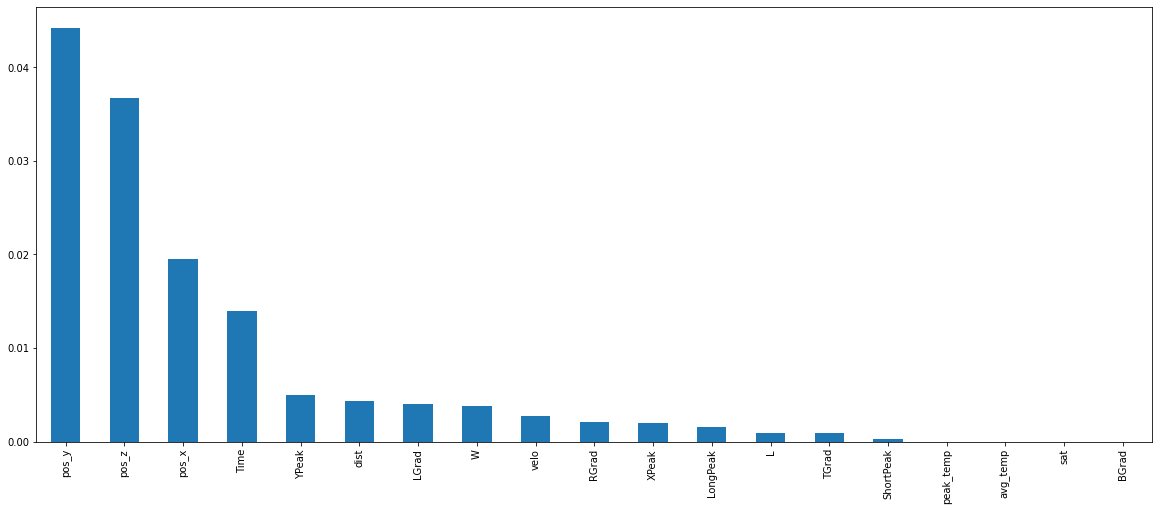

In [44]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [45]:
select_best = SelectKBest(mutual_info_classif,k=9)
select_best.fit(x_train, y_train)
x_train.columns[select_best.get_support()]

Index(['pos_x', 'pos_y', 'pos_z', 'dist', 'Time', 'XPeak', 'YPeak', 'velo',
       'W'],
      dtype='object')

In [54]:
# Mutual information regression
x = data.iloc[:,:-1]
y =  data.iloc[:,-1]
mutual_info = mutual_info_regression(x, y)

mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

pos_y        0.073986
pos_x        0.032538
dist         0.019447
pos_z        0.017364
W            0.006506
ShortPeak    0.005123
peak_temp    0.004620
Time         0.004086
RGrad        0.003917
LongPeak     0.002669
BGrad        0.001546
XPeak        0.001457
TGrad        0.001140
LGrad        0.000564
avg_temp     0.000000
sat          0.000000
YPeak        0.000000
velo         0.000000
L            0.000000
dtype: float64

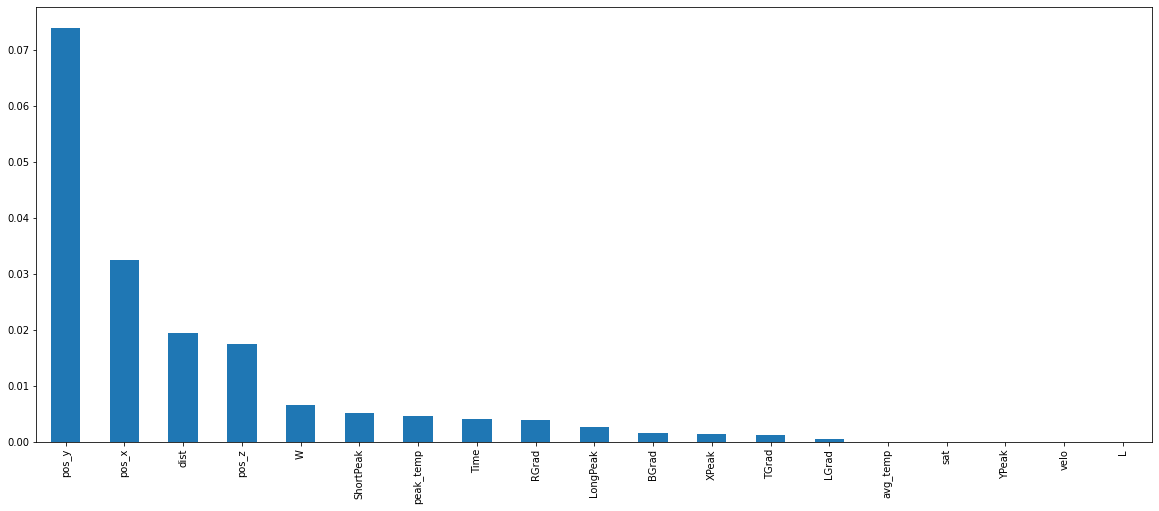

In [55]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [53]:
select_best = SelectKBest(mutual_info_regression,k=8)
select_best.fit(x_train, y_train)
x_train.columns[select_best.get_support()]

Index(['pos_x', 'pos_y', 'pos_z', 'ShortPeak', 'Time', 'XPeak', 'velo', 'W'], dtype='object')